In [ ]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2022-04-03 14:10:14--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.159.128, 74.125.126.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.159.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   151MB/s    in 1.3s    

2022-04-03 14:10:16 (151 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2022-04-03 14:10:16--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.234.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-tes

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img 

import matplotlib.pyplot as plt

In [ ]:
import zipfile

local_zip = './rps.zip'
zip_file = zipfile.ZipFile(local_zip, 'r')
zip_file.extractall('tmp/rps-train')
zip_file.close()

local_zip = './rps-test-set.zip'
zip_file = zipfile.ZipFile(local_zip, 'r')
zip_file.extractall('tmp/rps-test')
zip_file.close()

In [ ]:
import os

base_dir = './tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock data', len(os.listdir(rock_dir)))
print('total training paper data', len(os.listdir(paper_dir)))
print('total training scissors data', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print(rock_files[:10])
print(paper_files[:10])
print(scissors_files[:10])

total training rock data 840
total training paper data 840
total training scissors data 840
['rock04-066.png', 'rock05ck01-093.png', 'rock01-058.png', 'rock03-023.png', 'rock07-k03-024.png', 'rock02-112.png', 'rock05ck01-073.png', 'rock02-053.png', 'rock03-086.png', 'rock05ck01-094.png']
['paper04-023.png', 'paper07-047.png', 'paper05-036.png', 'paper04-091.png', 'paper04-072.png', 'paper02-086.png', 'paper01-065.png', 'paper02-082.png', 'paper01-085.png', 'paper04-025.png']
['scissors04-004.png', 'scissors03-036.png', 'scissors04-115.png', 'scissors01-031.png', 'scissors01-040.png', 'scissors04-005.png', 'scissors03-008.png', 'scissors03-110.png', 'scissors03-079.png', 'scissors03-098.png']


sample rock image


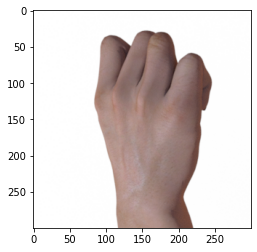

sample paper image


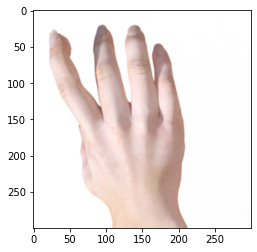

sample scissors image


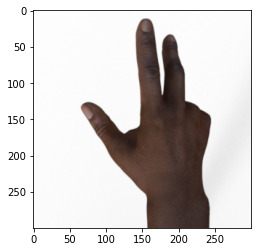

In [ ]:
print('sample rock image')
plt.imshow(load_img(os.path.join(rock_dir, rock_files[0])))
plt.show()

print('sample paper image')
plt.imshow(load_img(os.path.join(paper_dir, paper_files[0])))
plt.show()

print('sample scissors image')
plt.imshow(load_img(os.path.join(scissors_dir, scissors_files[0])))
plt.show()

In [ ]:
sample_image = load_img(os.path.join(rock_dir, rock_files[0]))

sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (300, 300, 3)


In [ ]:
def train_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
  ])
  print(model.summary())
  return model


In [ ]:
model = train_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
def train_val_generator(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest'
                                     )

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=126,
                                                      target_size=(150,150),
                                                      class_mode='categorical'
                                                      )                                    

  val_datagen = ImageDataGenerator(rescale=1.0/255)
  val_generator = val_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                  batch_size=126,
                                                  target_size=(150,150),
                                                  class_mode='categorical'
                                                  )                      
  return train_generator, val_generator                            

In [ ]:
train_gen, val_gen = train_val_generator('tmp/rps-train/rps', 'tmp/rps-test/rps-test-set')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
history = model.fit(train_gen, epochs=25, steps_per_epoch=20, validation_data=val_gen, verbose=1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 39s 1s/step - loss: 1.1509 - accuracy: 0.3607 - val_loss: 1.0856 - val_accuracy: 0.3710
Epoch 2/25
20/20 [==============================] - 26s 1s/step - loss: 1.0606 - accuracy: 0.4194 - val_loss: 0.9417 - val_accuracy: 0.6156
Epoch 3/25
20/20 [==============================] - 25s 1s/step - loss: 0.8788 - accuracy: 0.5837 - val_loss: 0.5144 - val_accuracy: 0.9382
Epoch 4/25
20/20 [==============================] - 25s 1s/step - loss: 0.6596 - accuracy: 0.7099 - val_loss: 0.3369 - val_accuracy: 0.9086
Epoch 5/25
20/20 [==============================] - 25s 1s/step - loss: 0.5688 - accuracy: 0.7702 - val_loss: 0.3441 - val_accuracy: 0.8548
Epoch 6/25
20/20 [==============================] - 25s 1s/step - loss: 0.4431 - accuracy: 0.8333 - val_loss: 0.2907 - val_accuracy: 0.9059
Epoch 7/25
20/20 [==============================] - 25s 1s/step - loss: 0.3309 - accuracy: 0.8766 - val_loss: 0.1051 - val_accuracy: 0.9731
Epoch 8/25
20/20 [==

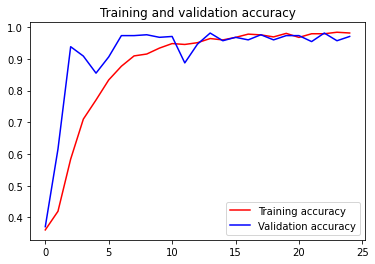

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()